In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
# idmb 모듈을 임포트하여 데이터를 적재하고, 가장 자주 등장하는 단어 500개만 사용
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
# 첫번째 리뷰의 길이 출력
print(len(train_input[0]))

218


In [5]:
# 두번째 리뷰의 길이 출력
# 리뷰마다 각각 길이가 다름, 하나의 리뷰가 하나의 샘플
print(len(train_input[1]))

189


In [6]:
# 첫번째 리뷰에 담긴 내용 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
# 타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
# 검증세트 분리하기
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [9]:
# 리뷰의 길이를 계산해 넘파이 배열에 담음
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [10]:
# 리뷰 길이의 평균과 중간값 출력
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


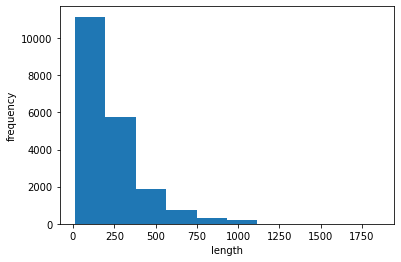

In [11]:
# lenghts 배열을 히스토그램으로 표현
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [12]:
# 시퀀스의 데이터의 길이를 맞추는 pad_sequences()를 사용해 train_input의 길이를 100으로 맞춤
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [13]:
print(train_seq.shape)

(20000, 100)


In [14]:
# 첫번째 샘플 출력
# 샘플의 앞뒤에 패딩값 0이 없는것으로 보다 100보다 길었을 것
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [15]:
# 앞이 잘렸는지 뒤가 잘렸는지 보기 위해 원본 샘플의 끝을 확인
# 뒷부분이 일치하므로 앞이 잘렸음을 유추 가능
# pad_sequences()는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자름
# truncating 매개변수의 값을 기본값 'pre'가 아닌 'post'로 바꾸면 뒷부분 잘라냄
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [16]:
# 여섯번째 샘플 출력
# 앞부분에 0이 있으므로 샘플의 길이가 100이 안됨
# 패딩 토큰은 시퀀스의 앞부분에 추가됨
# padding 매개변수의 값을 기본값 'pre'가 아닌 'post'로 바꾸면 뒷부분에 패딩을 추가함
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [17]:
# 검증세트의 길이도 100으로 맞춤
val_seq = pad_sequences(val_input, maxlen=100)

In [18]:
# 순환 신경망 만들기
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [19]:
# to_categorical(): 정수 배열을 입력하면 자동으로 원핫인코딩된 배열을 반환해줌
train_oh = keras.utils.to_categorical(train_seq)

In [20]:
print(train_oh.shape)

(20000, 100, 500)


In [21]:
# val_seq도 원핫 인코딩으로 바꿈
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 순환 신경망 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 21s 62ms/step - loss: 0.6989 - accuracy: 0.5041 - val_loss: 0.6978 - val_accuracy: 0.5038
Epoch 2/100
313/313 [==============================] - 19s 59ms/step - loss: 0.6946 - accuracy: 0.5102 - val_loss: 0.6949 - val_accuracy: 0.5102
Epoch 3/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6920 - accuracy: 0.5200 - val_loss: 0.6930 - val_accuracy: 0.5146
Epoch 4/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6901 - accuracy: 0.5302 - val_loss: 0.6916 - val_accuracy: 0.5230
Epoch 5/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6883 - accuracy: 0.5408 - val_loss: 0.6905 - val_accuracy: 0.5270
Epoch 6/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6866 - accuracy: 0.5472 - val_loss: 0.6894 - val_accuracy: 0.5356
Epoch 7/100
313/313 [==============================] - 19s 59ms/step - loss: 0.6845 - accuracy: 0.5563 - val_loss: 0.6880 - val_ac

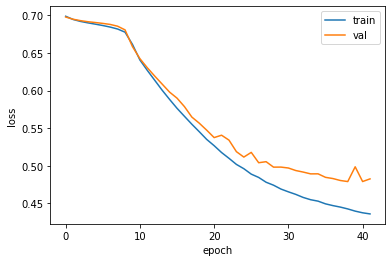

In [ ]:
# 훈련손실과 검증손실 그래프로 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# Word Embedding 사용하기
# 각 단어를 고정된 크기의 실수 벡터로 바꾸어 줌
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6949 - accuracy: 0.5066 - val_loss: 0.6933 - val_accuracy: 0.5052
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6914 - accuracy: 0.5254 - val_loss: 0.6914 - val_accuracy: 0.5242
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6888 - accuracy: 0.5439 - val_loss: 0.6877 - val_accuracy: 0.5494
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6793 - accuracy: 0.6054 - val_loss: 0.6740 - val_accuracy: 0.6296
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6614 - accuracy: 0.6687 - val_loss: 0.6551 - val_accuracy: 0.6850
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6404 - accuracy: 0.7051 - val_loss: 0.6353 - val_accuracy: 0.7040
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6204 - accuracy: 0.7263 - val_loss: 0.6173 - val_accuracy:

In [ ]:
# 훈련손실과 검증손실 그래프로 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- Corpus(말뭉치): 자연어 처리에서 사용하는 덱스트 데이터의 모음, 즉 훈련 데이터셋

- 토큰: 텍스트에서 공백으로 구분되는 문자열

- 원핫인코딩: 어떤 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터, 정수로 변환된 토큰을 원핫인코딩으로 변환하려면 어휘 사전 크기의 벡터가 만들어짐

- Word Embedding: 정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환함, 밀집 벡터는 단어 사이의 관계를 표현할 수 있기에 자연어 처리에서 좋은 성능을 보임